# Задание 1

В данном задание надо будет реализовать расчёт функции потерь и градиента для softmax-регрессии. 

Итак, мы строим алгоритм softmax-регрессии для $n$ признаков и $K$ классов. У нас будет $((n+1)\times{K})$ весов $w$, а наша целевая переменная описывается в виде $y=[y_1,y_2,...,y_K]$, где только одно из K чисел равно 1, а остальные равны 0.

Функция потерь будет иметь вид:

$$L(w)=-\sum_{i=1}^{L}\sum_{k=1}^{K}y_{k}log(s_{k})$$


где $s_{j}$  - наши нормированные софтмакс-предсказания:

$$s_{j}=\frac{e^{a_{j}}}{\sum_{k=1}^{K}e^{a_{k}}}$$

$a_{k}$ - ответы линейного алгоритма для класса $k$:

$$a_{k}=\sum_{j=1}^{n+1}x_{j}w_{jk},k=1,2,...,K$$





In [39]:
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [131]:
def softmax(z):
    """
    Compute softmax function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the softmax function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed softmax function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the softmax of each value of z (z can be a matrix, vector or scalar).
    """
    return np.exp(z) / np.sum(np.exp(z), )

## Gradient of softmax loss function

Пусть для конкретного $x$ i- его настоящий класс. Тогда функцию потерь можно записать в виде:

$$L(w;x)=-\sum_{k=1}^{K}y_{k}log(s_{k})=-y_{i}log(s_{i})$$

Посчитаем производные с помощью цепного правила дифференцирования:

$$\frac{\partial{L(w;x)}}{\partial{s_i}}=-\frac{y_i}{s_i}$$

если $i=j$

$$\frac{\partial{s_i}}{\partial{a_i}}=s_i(1-s_i)$$

если $i\ne{j}$

$$\frac{\partial{s_i}}{\partial{a_j}}=-s_is_j$$

и

$$\frac{\partial{a_j}}{\partial{w_{kj}}}=x_k$$

Таким образом, при  $i=j$

$$\frac{\partial{L(w,x)}}{\partial{w_{kj}}}=\frac{\partial{L(w;x)}}{\partial{s_i}}\frac{\partial{s_i}}{\partial{a_j}}\frac{\partial{a_j}}{\partial{w_{kj}}}=y_i(s_i-1)x_k=(s_i-1)x_k$$

и при $i\ne{j}$

$$\frac{\partial{L(w,x)}}{\partial{w_{kj}}}=\frac{\partial{L(w;x)}}{\partial{s_i}}\frac{\partial{s_i}}{\partial{a_j}}\frac{\partial{a_j}}{\partial{w_{kj}}}=y_is_jx_k=s_jx_k$$

В векторном виде градиент можно записать в следующем виде:

$$\frac{\nabla{L(w,x)}}{\nabla{w}}=(s-y)x^T$$

In [132]:
def costFunction(w, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    w : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : array_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    L : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to w, at the current values of w.
        
    Instructions
    ------------
    Compute the cost of a particular choice of w. You should set L to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in w.
    """
    m, n = X.shape
    k = y.shape[1]
    w = w.reshape(-1, k)
    
    z = X @ w
    sv = softmax(z)
    
    L = - np.sum(y * np.log(sv))
    grad = - (X.T @ (y - sv))
    
    return L / m, grad / m

In [133]:
def predict(w, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(w.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    w : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    y_pred : array_like
        Predictions [p1,...pK] for each row, pk={0,1}    
    """
    preds = np.dot(X, w)
    return np.argmax(preds, axis=1)

In [134]:
# test_case
X = np.array([[2,7],[3,5],[1,1],[0,0]])
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y=np.array([[0,1,0],[1,0,0],[0,0,1],[0,0,1]])

m, n = X.shape
k = y.shape[1]
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)
initial_w = np.ones((n+1,k))

from scipy import optimize
options= {'maxiter': 400}

###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# optimize.minimize превращает матрицу весов w размера n+1xk в вектор длиной n+1*K
# чтобы этого избежать, нужно в costFunction добавить reshape вектора весов в K столбцов

# see documention for scipy's optimize.minimize  for description about
# the different parameters
res = optimize.minimize(costFunction,
                        initial_w,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options,)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized w
cost = res.fun

# the optimized w is in the x property
w = res.x

# Print theta to screen
print('Cost at w found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('w:')
print('\t[{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f}]'.format(*w))
print('Expected w (approx):\n\t[-10.380, -2.698, 16.049,11.651, -7.020, -1.704,-1.142, 5.287, -1.148]')

Cost at w found by optimize.minimize: 2.091
Expected cost (approx): 0.203

w:
	[11.102, 11.477, 23.739,10.094, 6.095, 1.267,6.171, 10.191, -1.224]
Expected w (approx):
	[-10.380, -2.698, 16.049,11.651, -7.020, -1.704,-1.142, 5.287, -1.148]


In [143]:
from sklearn.preprocessing import label_binarize
np.random.seed(666)
N = 100
num_cls = 0
Xs = []
Ys = []

X = np.array([[2,7],[3,5],[1,1],[0,0]])

for offset_x in [0, 1.5, 3]:
    for offset_y in [0, 1.5, 3]:
        X1 = np.random.rand(N, 2) + np.array([offset_x, offset_y])
        y1 = [num_cls] * N
        Xs.append(X1)
        Ys.append(y1)
        num_cls += 1

X = np.concatenate(Xs)
y = np.concatenate(Ys)

X_bin = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
y_bin = label_binarize(y,classes=range(9))
k = y_bin.shape[1]
initial_w = np.ones((n+1,k))

In [144]:
res = optimize.minimize(costFunction,
                        initial_w,
                        (X_bin, y_bin),
                        jac=True,
                        method='TNC',
                        options=options)

w = res.x.reshape((n+1, k))

In [145]:
y_pred = predict(w, X_bin)

In [146]:
from sklearn.metrics import classification_report

In [147]:
y_bin = np.argmax(y_bin, axis=1)
print(classification_report(y_pred, y_bin))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.00      0.00      0.00        74
           2       0.01      0.03      0.02        31
           3       0.00      0.00      0.00         0
           4       0.10      0.23      0.14        44
           5       0.24      0.16      0.20       146
           6       0.00      0.00      0.00         0
           7       0.17      0.03      0.06       500
           8       0.00      0.00      0.00         0

    accuracy                           0.06       900
   macro avg       0.06      0.05      0.05       900
weighted avg       0.14      0.06      0.07       900



# Задание 2. 

На семинаре мы с вами разбирали пример задачи многоклассовой классификации,а именно классификация заболеваний щитовидной железы. При разборе автором (намеренно) были допущены 2 методологические (т.е. не в коде) ошибки: одна из связанна с обучением линейных алгоритмов классификации, а вторая допущена при оценке качества обученных моделей. Найдите эти ошибки.

Проблема 1. При оценки качества OVO моделей использовалась версия ROC-AUC для моделей OVR. 

Проблема 2.

Рассмотрим код:

```Python
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, 
                                                    test_size=0.25, 
                                                    shuffle=True,
                                                    stratify=y_sm)
```

Видно, что данные разбиваются на train и test стратифицированно(*stratify=y_sm*), однако делается это по дополненному алгоритмом *SMOTE* набору данных. Алгоритм увеличивает количество данных с малочисленными классами путем сэмплирования синтетических наблюдений, тем самым баласируя датасет по количеству того или иного класса, однако данный подоход ведет к потере информации об изначальных долях тех или иных лейблов. Так что в данном конкртеном случае стратификация является бессмысленной и должна делаться по `y`, a не по `y_sm`.

*P.S* Вот во второй проблеме супер неуверен

# Задание 3

В данном задание вам предстоит научится определять тип лесного покрова в национальном лесу Рузвельта в Северном Колорадо.

<div>
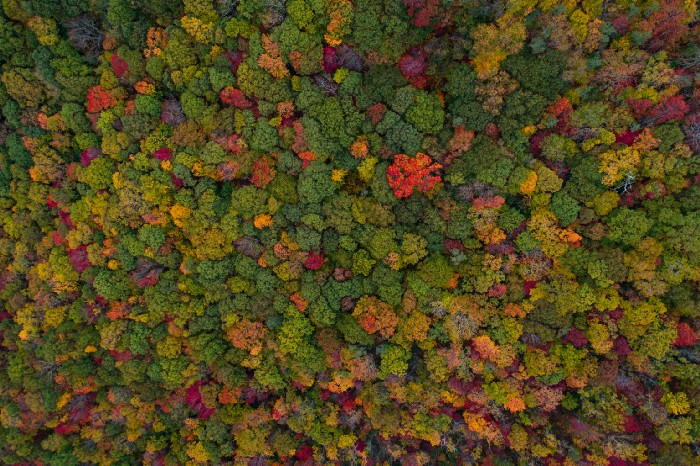
</div>

https://archive.ics.uci.edu/ml/datasets/covertype

Список колонок ниже. Целевая колонка - Cover_Type

Name / Data Type / Measurement / Description

* Elevation / quantitative /meters / Elevation in meters
* Aspect / quantitative / azimuth / Aspect in degrees azimuth
* Slope / quantitative / degrees / Slope in degrees
* Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features

* Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features

* Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway

* Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice

* Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice

* Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice

* Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points

* Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation

* Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation

* Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

Типы лесных масивов:
    
    1 - Spruce/Fir
    2 - Lodgepole Pine
    3 - Ponderosa Pine
    4 - Cottonwood/Willow
    5 - Aspen
    6 - Douglas-fir
    7 - Krummholz

Задача 1. Реализовать класс forest_Cover_type_predictor, который умеет: а) предобрабатывать исходные данные в удобный формат; б) обучаться для задачи многоклассовой классификации; 3) оценивать качество своих прогнозов 4) сохранять модели на жесткий диск и подгружать их; 5) давать предсказания на новых данных (считайте, что они имеют тот же вид, как и тестовые данные)

Задача 2. Подготовить отчёт о решении данной задачи. В отчёте, в частности, вы должны ответить на следующие вопросы:
а) какие фичи использовали для вашей модели, какие преобработки данных?
б) какие модели пробовали? Почему пробовали именно их?
в) Какие метрики использовали для оценки качества вашей модели? Чем обусловлен выбор именно этих метрик?
г) Какое итоговое качество модели на тестовом датасете?

Комментарий к заданию. Основная цель данного задания - подготовить в течение недели рабочий бэйзлаин модели, который можно использовать в реальной задаче. Не стоит сильно упарываться в придумывание новых фичей, модели лучше использовать те, которые мы с вами рассматривали на семинаре. При этом нужно аккуратно поработать с данными, пайплайном вашего алгоритма (см. семинар Дмитрия Салтовского по переобучению и категориальным фичам) и метриками качества, чтобы ваши оценки качества модели на обучении примерно соответствовали метрикам на тестовой подвыборке.

In [93]:
import os 
import json
from typing import Callable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pickle 

class NotFittedError(Exception):
    pass

class forest_Cover_type_predictor:
    def __init__(self, data:pd.DataFrame=None) -> None:
        if data is not None:
            self.data = data
        
        self.model_fitted = False
        self.x_train, self.x_test, self.y_train, self.y_test = [None] * 4
    
    def load_data(self,
                  source:str, 
                  file_path:str, 
                  delimiter:str=',',
                  header:bool=True) -> None:
        
        if source is None:
            raise ValueError('please specify source type')
        if not os.path.exists(file_path):
            raise FileNotFoundError('no file %s', file_path)
            
        if source == 'txt':
            data = np.array([])
            df = {}
            df_columns = None
            
            with open(file_path) as f:
                for line in f.readlines():
                    if header:
                        df_columns = line.split(delimiter)
                        
                    continue
                    
                    nums = [float(num) for num in line.split(delimiter)]
                    data = np.append(data, nums, axis=0)
                    
            if df_columns is None: 
                df_columns = [str(i) for i in range(data.shape[0])]
                
            if header:
                for i, col in enumerate(df_columns):
                    df[col] = nums[:, i]
                    
            self.data = pd.DataFrame.from_dict(df)
        
        elif source == 'json':
            with open(file_path) as f:
                df = json.load(f)
                
            self.data = pd.DataFrame.from_dict(df)
        
        elif source == 'csv':
            if header is None:
                self.data = pd.read_csv(file_path, delimiter=delimiter, header=None)
            else:
                self.data = pd.read_csv(file_path, delimiter=delimiter,)
        
        else:
            raise ValueError("file type not supported")
            
    def prepare_data(self, label_column:str, tts_params:dict) -> None:
        if label_column is None:
            raise ValueError("label_column is None")
        elif not isinstance(label_column, str):
            raise TypeError("label_column must be str")
        elif label_column not in self.data.columns:
            raise ValueError("%s not in columns", label_column)
            
        if tts_params is None:
            raise ValueError("tts_params is None")
        elif not isinstance(tts_params, dict):
            raise TypeError("tts_params must be dict") 
            
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.data.drop(columns=[label_column]),
                                                                                data[label_column],
                                                                                **tts_params,)
        
    def save_model(self, save_dir:str, filename:str) -> None:
        if not os.path.exists(save_dir):
            raise ValueError("specified directory doesn't exist")
        
        if not isinstance(save_dir, str) or isinstance(filename, str):
            raise TypeError("both save_dir and filename must be str")
            
        if not self.model_fitted:
            raise NotFittedError("not fitted model cannot be saved!")
        
        filename = os.path.join(save_dir, filename)
        
        with open(filename, 'wb') as f:
            pikcle.dump(self.model, f)
            
        print(f"Model saved succesfully at {save_dir}")
        
        
    def load_model(self, path:str) -> None:
        if not os.path.exists(path):
            raise FileNotFoundError("no such file %s", path)
            
        with open(path, 'rb') as f:
            self.model = pickle.load(f)
            
        self.fitted_model = True
        
            
    def fit(self, model, model_params:dict):
        if not isinstance(model_params, dict):
            raise TypeError('model_params must be dict')
            
        if isinstance(model, str):
            if model == 'logreg':
                self.model = LogisticRegression(**model_params)
            elif model == 'svm':
                self.model = SVC(**model_params)
                
        else:
             self.model = model
                
        self.model = self.model.fit(x_train, y_train)
        self.model_fitted = True
        
        return self.model
    
    def predict(self, data_to_predict) -> np.ndarray:
        if not self.model_fitted:
            raise NotFittedError("can only make predictions with fitted model!")
            
        return self.model.predict(data_to_predict)
    
    def eval_model(self, eval_x, eval_y, metric:Callable):
        preds = self.model.predict(eval_x)
        
        print("Metric %s Score: %s", metric.__name__, metric(preds, eval_y))

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter("ignore")
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import classification_report, confusion_matrix, hamming_loss, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from tqdm import tqdm

In [91]:
data = pd.read_csv('covtype.csv', header=None)

In [92]:
data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [94]:
X,y = data.drop(columns=[54]), data[54]

In [95]:
skb = SelectKBest(f_classif, k=25)
X = skb.fit_transform(X, y)

In [150]:
skb.get_feature_names_out()

array(['x0', 'x2', 'x3', 'x5', 'x6', 'x7', 'x9', 'x10', 'x13', 'x14',
       'x15', 'x16', 'x17', 'x18', 'x19', 'x23', 'x25', 'x27', 'x30',
       'x35', 'x36', 'x42', 'x51', 'x52', 'x53'], dtype=object)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.3,
                                                    shuffle=True,)

In [98]:
catboost = CatBoostClassifier()

In [99]:
catboost.fit(x_train, y_train,
             eval_set=(x_test, y_test),)

Learning rate set to 0.121762
0:	learn: 1.6212559	test: 1.6220117	best: 1.6220117 (0)	total: 92.9ms	remaining: 1m 32s
1:	learn: 1.4356489	test: 1.4367304	best: 1.4367304 (1)	total: 178ms	remaining: 1m 28s
2:	learn: 1.3039779	test: 1.3052443	best: 1.3052443 (2)	total: 278ms	remaining: 1m 32s
3:	learn: 1.2048890	test: 1.2061262	best: 1.2061262 (3)	total: 367ms	remaining: 1m 31s
4:	learn: 1.1250723	test: 1.1266964	best: 1.1266964 (4)	total: 456ms	remaining: 1m 30s
5:	learn: 1.0609270	test: 1.0627637	best: 1.0627637 (5)	total: 543ms	remaining: 1m 29s
6:	learn: 1.0067927	test: 1.0087398	best: 1.0087398 (6)	total: 629ms	remaining: 1m 29s
7:	learn: 0.9637061	test: 0.9657486	best: 0.9657486 (7)	total: 719ms	remaining: 1m 29s
8:	learn: 0.9255895	test: 0.9277656	best: 0.9277656 (8)	total: 812ms	remaining: 1m 29s
9:	learn: 0.8926580	test: 0.8949309	best: 0.8949309 (9)	total: 906ms	remaining: 1m 29s
10:	learn: 0.8615807	test: 0.8638555	best: 0.8638555 (10)	total: 999ms	remaining: 1m 29s
11:	learn:

In [100]:
train_preds = catboost.predict(x_train)
test_preds = catboost.predict(x_test)

In [101]:
print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           1       0.88      0.85      0.87    148284
           2       0.88      0.91      0.90    198223
           3       0.91      0.92      0.91     25116
           4       0.91      0.87      0.89      1952
           5       0.89      0.60      0.72      6552
           6       0.85      0.79      0.82     12140
           7       0.95      0.90      0.92     14441

    accuracy                           0.88    406708
   macro avg       0.89      0.84      0.86    406708
weighted avg       0.88      0.88      0.88    406708

              precision    recall  f1-score   support

           1       0.87      0.85      0.86     63556
           2       0.87      0.91      0.89     85078
           3       0.90      0.91      0.90     10638
           4       0.89      0.83      0.86       795
           5       0.87      0.58      0.70      2941
           6       0.84      0.77      0.81      5227
           7       0.94 

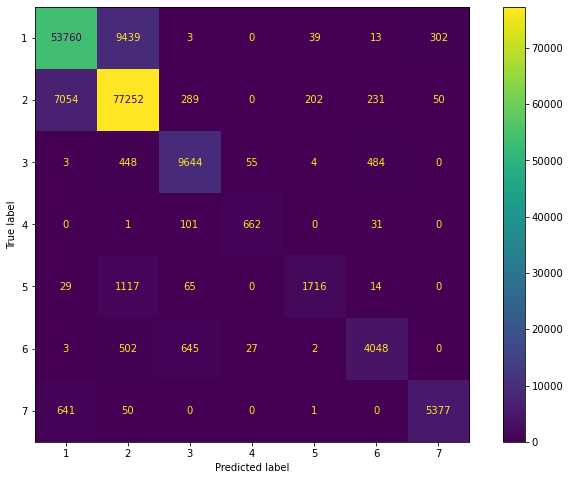

In [107]:
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, test_preds)
cmp = ConfusionMatrixDisplay(cm, display_labels=catboost.classes_)
cmp.plot(ax=ax)

plt.show();

In [130]:
hamming_loss(y_test, test_preds)

0.12532701487057096

## Отчет 

При анализе фичей стало понятно что, примерно 80%из них - категориальные, поэтому было принято решение обучать *CatBoostClassifier*.

Для отбора фичей использовалась утилилита *SelectKBest* c оценивающей функцией *f_classif*(ANOVA F-value) и k = 25.

В результате алгоритм отобрал 25 лучших фичей для обучения классификатора: *'x0', 'x2', 'x3', 'x5', 'x6', 'x7', 'x9', 'x10', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x23', 'x25', 'x27', 'x30', 'x35', 'x36', 'x42', 'x51', 'x52', 'x53'*.

Далее данные были случайным образом разбиты на train и test выборки (размер тестовой выборки  ~30% от первоначальной).

Для оценки качества модели были использованы *classification_report* и *hamming_loss*.

На тестовой выборке модель показала следующие результаты: 

                   precision    recall  f1-score   support

           1       0.87      0.85       0.86       63556
           2       0.87      0.91       0.89       85078
           3       0.90      0.91       0.90       10638
           4       0.89      0.83       0.86       795
           5       0.87      0.58       0.70       2941
           6       0.84      0.77       0.81       5227
           7       0.94      0.89       0.91       6069

    accuracy                            0.87       174304
    macro avg       0.88      0.82      0.85       174304
    weighted avg    0.87      0.87      0.87       174304
    
Из таблицы видно, что взвешанный F1 - 0.87, что является неплохим бейзлайном, учитывая то, что мы не делали никакой предобработки и чистки данных.

*Hamming Loss* показывет долю неправильных предсказаний алгоритма классификации, в независимости от их количества.

*Hamming Loss* на тесте: 0.12532701487057096

Данное число значит, что алгоритм неправильно предсказывает тип покрова примерно в 12,5% случаев (каждый 8).